In [1]:
from __future__ import print_function
from __future__ import division

import pdb
import sys
import os
import numpy as np
import scipy.optimize as opt
import scipy.io as sio
import scipy.special as spf
import yaml

## import diffrantion integral solver from Optics folder
work_dir = os.getcwd()
date_dir = os.path.split(work_dir)[0]
optics_folder = os.path.join(date_dir, 'Optics')
sys.path.append(optics_folder)
sys.path.append(date_dir)
import diffraction_int as diffi
import fibonacci as fib


## Import field functions
# field_module_folder = os.path.join(date_dir, 'field_functions')             
# sys.path.append(field_module_folder)
# import far_fields as fi

## Read parameter file to obtain fields
path_to_yaml = '../curly_param.yaml'
stream = open(path_to_yaml,'r')
print('reading parameters from {}'.format(path_to_yaml))
parameters = yaml.load(stream)


## plotting stuff
import matplotlib as mpl
# mpl.font_manager._rebuild()
% matplotlib inline
mpl.rcParams['text.usetex'] = True
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# mpl.rc('font',**{'family':'serif','serif':['Palatino']})

# font = {'family':'Helvetica', 'Helvetica': ['Helvetica']}
# mpl.rc('font',**{'family':'serif','serif':'cmunrm'})

# plt.rc('font',**font)
# import matplotlib
mpl.rcParams['font.size'] = 10
# mpl.rcParams['font.family'] = 'Calibri'

import matplotlib.pyplot as plt

## colorbar stuff 
from mpl_toolkits import axes_grid1

# import eqm_slns as osc

## analytic image functions
# import analytic_intensity_functions_xyz as imf

## dipole moments as functions of separation, not pulled from param file
# import p_of_d_genOr as pod

# pretty fitting
# import lmfit as lf

import anal_foc_diff_fields as afi


## Import physical constants
full_path_to_constant_yaml = os.path.join(date_dir,'physical_constants.yaml')
opened_constant_file = open(full_path_to_constant_yaml,'r')
constants = yaml.load(opened_constant_file)
e = constants['physical_constants']['e']
c = constants['physical_constants']['c']  # charge of electron in statcoloumbs
hbar =constants['physical_constants']['hbar']
nm = constants['physical_constants']['nm']
n_a = constants['physical_constants']['nA']   # Avogadro's number
# Z_o = 376.7303 # impedence of free space in ohms (SI)

## System background
n_b = parameters['general']['background_ref_index']
eps_b = n_b**2.

a = parameters['plasmon']['radius']
#######################################################################
## simulated image 
sensor_size = 2000*nm
# height = 2*mm  # also defines objective lens focal length 
height = .2
resolution = 100  # image grid resolution

norm_style = 'per fig'  # 'per fig' or 'across figs'

show_or_save = 'show'
# show_or_save = raw_input('( show / save ) figures? ')

file_extension = 'pdf'  # 'pdf' for mest quality

## plot parameters
plot_scale = 1/nm

#######################################################################
## Optics stuff.  

## Build image sensor
eye = diffi.observation_points(
    x_min= -sensor_size/2, 
    x_max= sensor_size/2,
    y_min= -sensor_size/2, 
    y_max= sensor_size/2, 
    points= resolution
    )

## Experimental parameters
magnification = 1
numerical_aperture = 1
max_theta = np.arcsin(numerical_aperture) # defines physical aperture size

## numerical parameters for calculation of scattered field
lens_points = 1000

# obj_f = 1.*mm  # still dont know what this is supposed to be
obj_f = height

tube_f = magnification * obj_f

## calculate dipole magnitudes
drive_hbar_omega = parameters['general']['drive_energy']
omega_drive = drive_hbar_omega/hbar  # driving frequency

import coupled_dipoles as cp 

reading parameters from ../curly_param.yaml
reading parameters from ../curly_param.yaml
../curly_param.yaml
polarizability reduced by factor of 1
coupling scaled up by by factor of 1


In [28]:
import spectra as spe
locations = diffi.observation_points(x_min=5, x_max=150, y_min=5, y_max=150, points=5)[0]
locations = np.hstack((locations,np.zeros((locations.shape[0],1))))
plot_limits=[-25,375]

min_energy = 1.5
max_energy = 2.2 
freq_step_size = 0.001

# mol_E, plas_E, p0_unc_E, p0, p1 = dipole_fields(locations, mol_angle=np.pi/2)

# angles, Px_per_drive_I, Py_per_drive_I = powers_and_angels(mol_E + plas_E)
# unc_angles, unc_Px_per_drive_I, unc_Py_per_drive_I = powers_and_angels(p0_unc_E)

# quiver_plot(locations[:,0], locations[:,1], f_inv(angles), plot_limits)
# plot_phase_quiver(locations[:,0], locations[:,1], f_inv(angles), p0, p1, plot_limits)

In [29]:

spectra = spe.calculate_scatt_spectra( mol_angle=np.pi/2, plas_angle=np.pi/2, locations=locations*nm, 
                                      energies=np.arange(min_energy, max_energy, freq_step_size)
)

Text(0.5,1,'normalized')

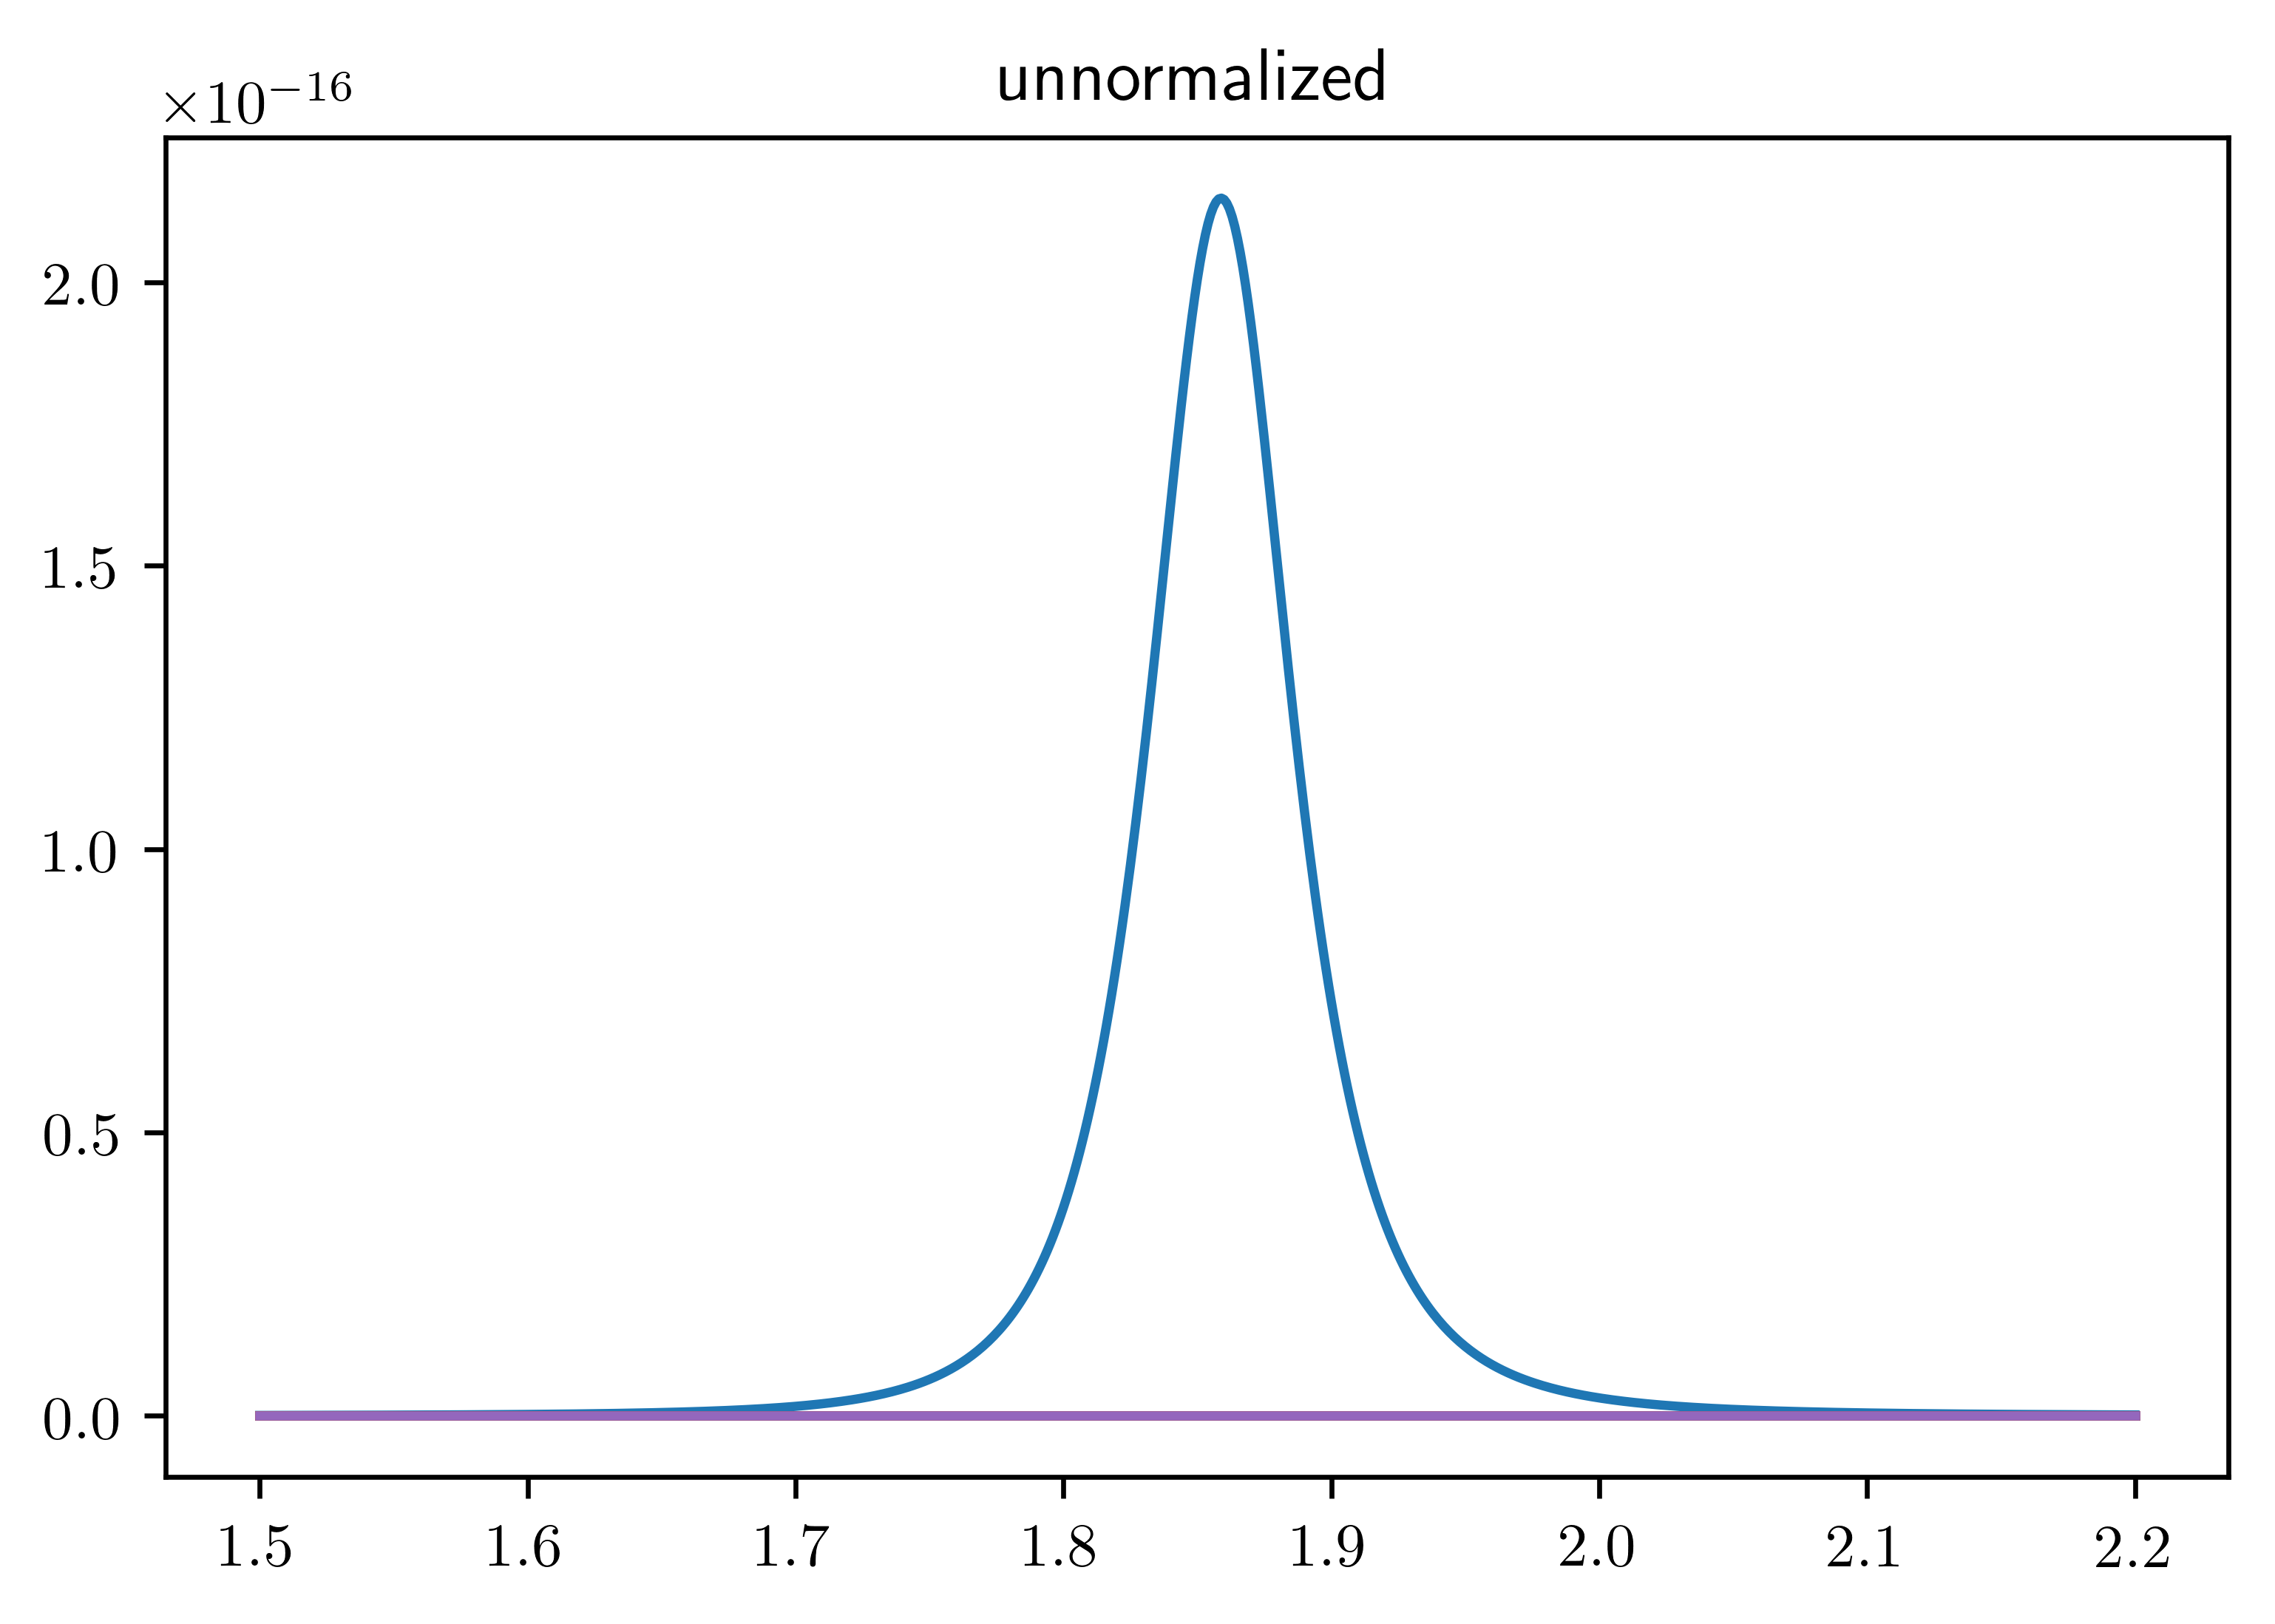

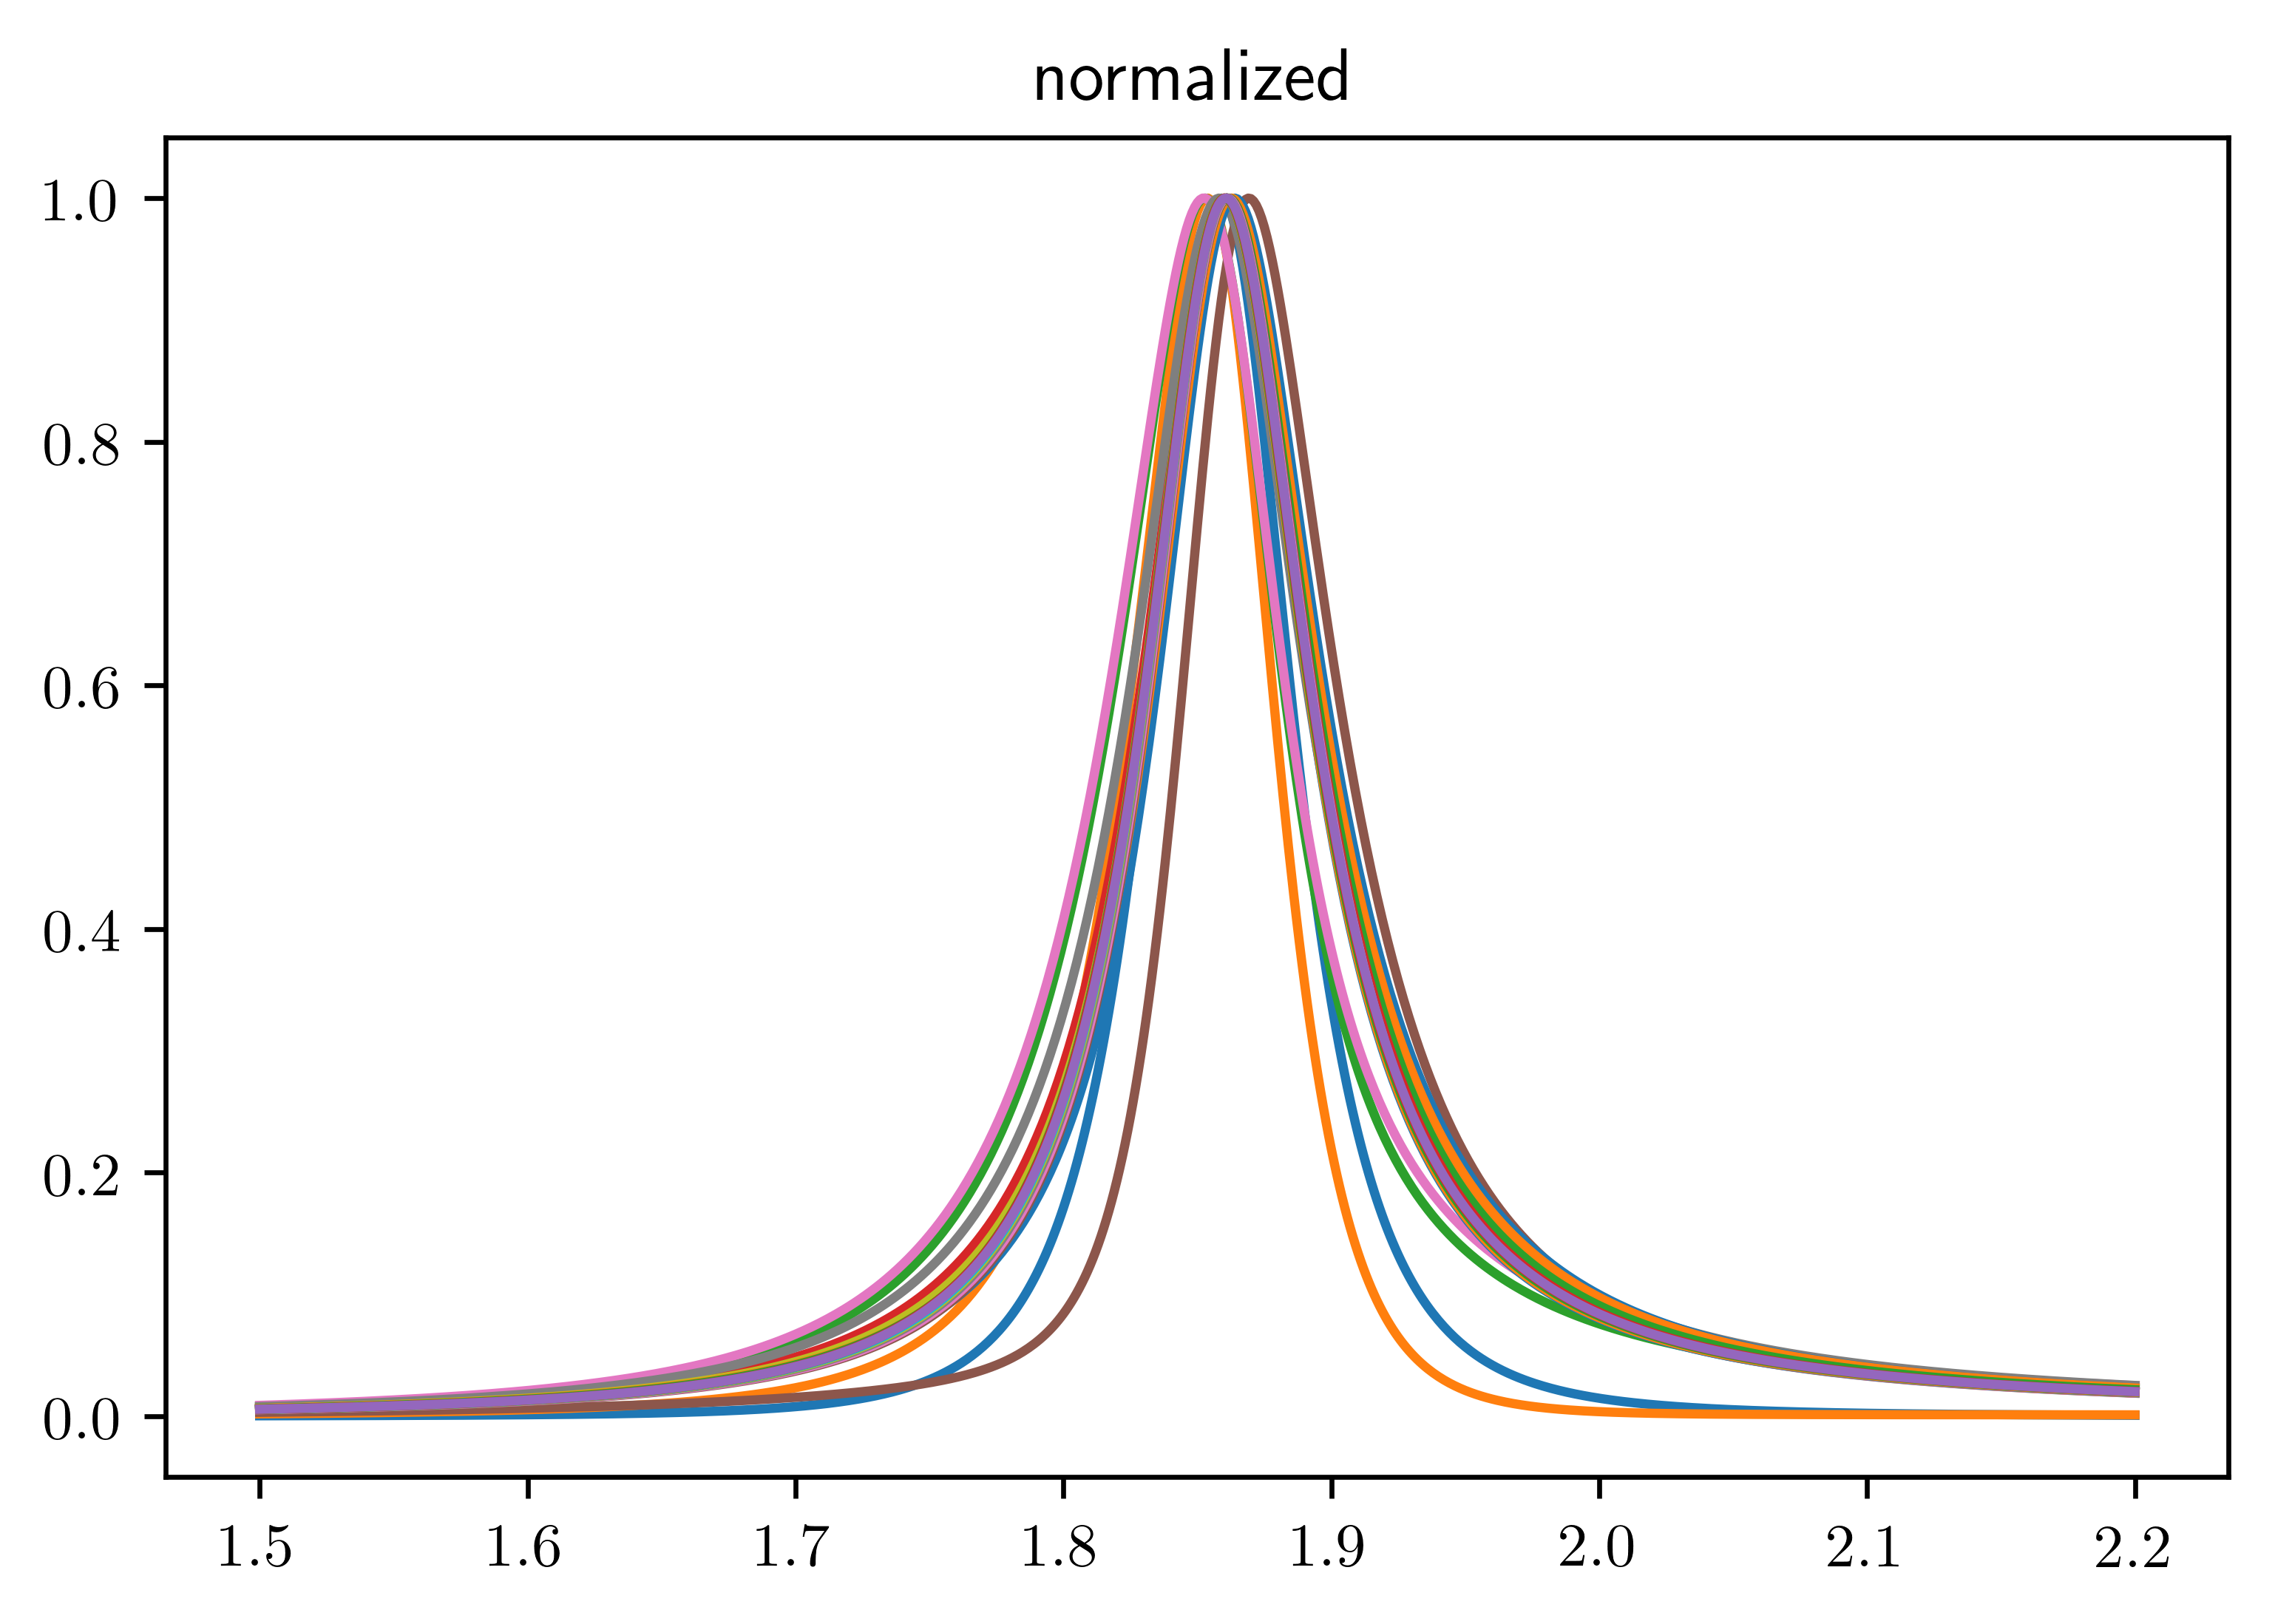

In [19]:
plt.figure(dpi=600)
plt.plot(spectra[0],spectra[1].T)
plt.title('unnormalized')
plt.figure(dpi=600)
plt.plot(spectra[0],spectra[1].T/np.max(spectra[1].T,axis=0))
plt.title('normalized')

In [20]:
(np.max(spectra[1].T,axis=0)).shape

(25,)

In [21]:
locations

array([[  5.  ,   5.  ,   0.  ],
       [  5.  ,  91.25,   0.  ],
       [  5.  , 177.5 ,   0.  ],
       [  5.  , 263.75,   0.  ],
       [  5.  , 350.  ,   0.  ],
       [ 91.25,   5.  ,   0.  ],
       [ 91.25,  91.25,   0.  ],
       [ 91.25, 177.5 ,   0.  ],
       [ 91.25, 263.75,   0.  ],
       [ 91.25, 350.  ,   0.  ],
       [177.5 ,   5.  ,   0.  ],
       [177.5 ,  91.25,   0.  ],
       [177.5 , 177.5 ,   0.  ],
       [177.5 , 263.75,   0.  ],
       [177.5 , 350.  ,   0.  ],
       [263.75,   5.  ,   0.  ],
       [263.75,  91.25,   0.  ],
       [263.75, 177.5 ,   0.  ],
       [263.75, 263.75,   0.  ],
       [263.75, 350.  ,   0.  ],
       [350.  ,   5.  ,   0.  ],
       [350.  ,  91.25,   0.  ],
       [350.  , 177.5 ,   0.  ],
       [350.  , 263.75,   0.  ],
       [350.  , 350.  ,   0.  ]])

In [22]:
p0_spec = spe.single_dip_scat_spec(0,energies=np.arange(min_energy, max_energy, freq_step_size))

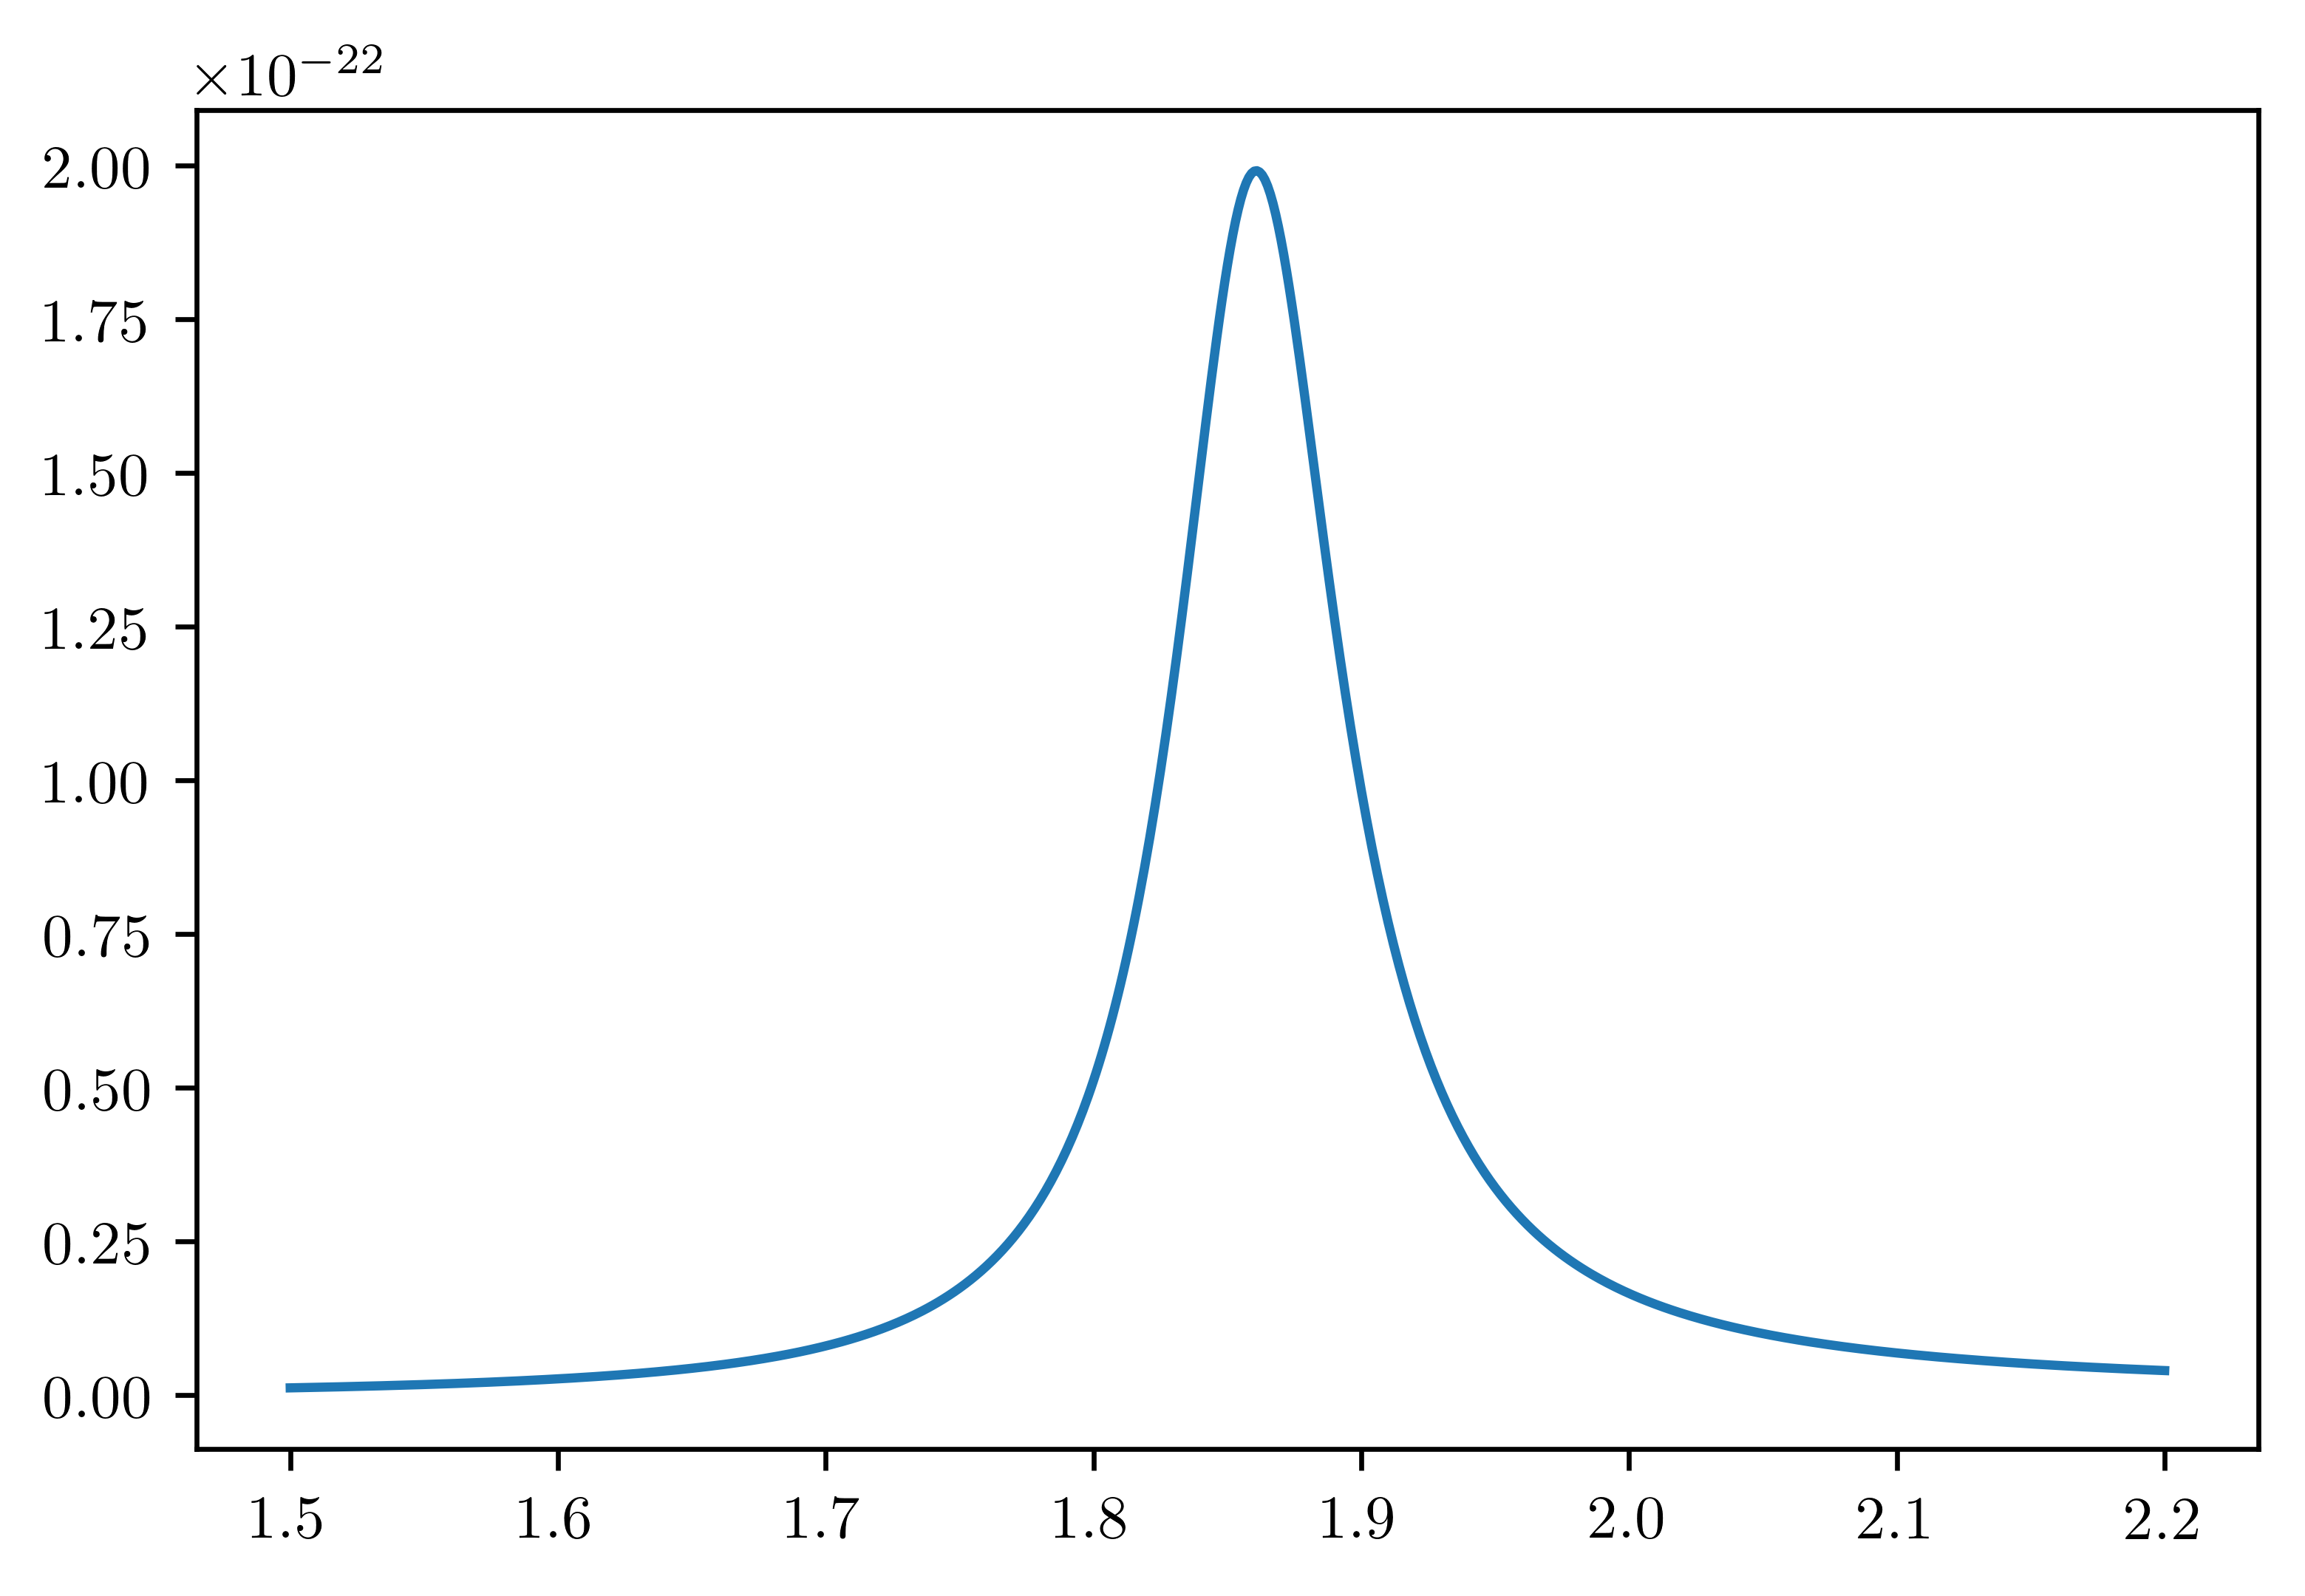

In [23]:
plt.figure(dpi=600)
plt.plot(p0_spec[0],p0_spec[1])

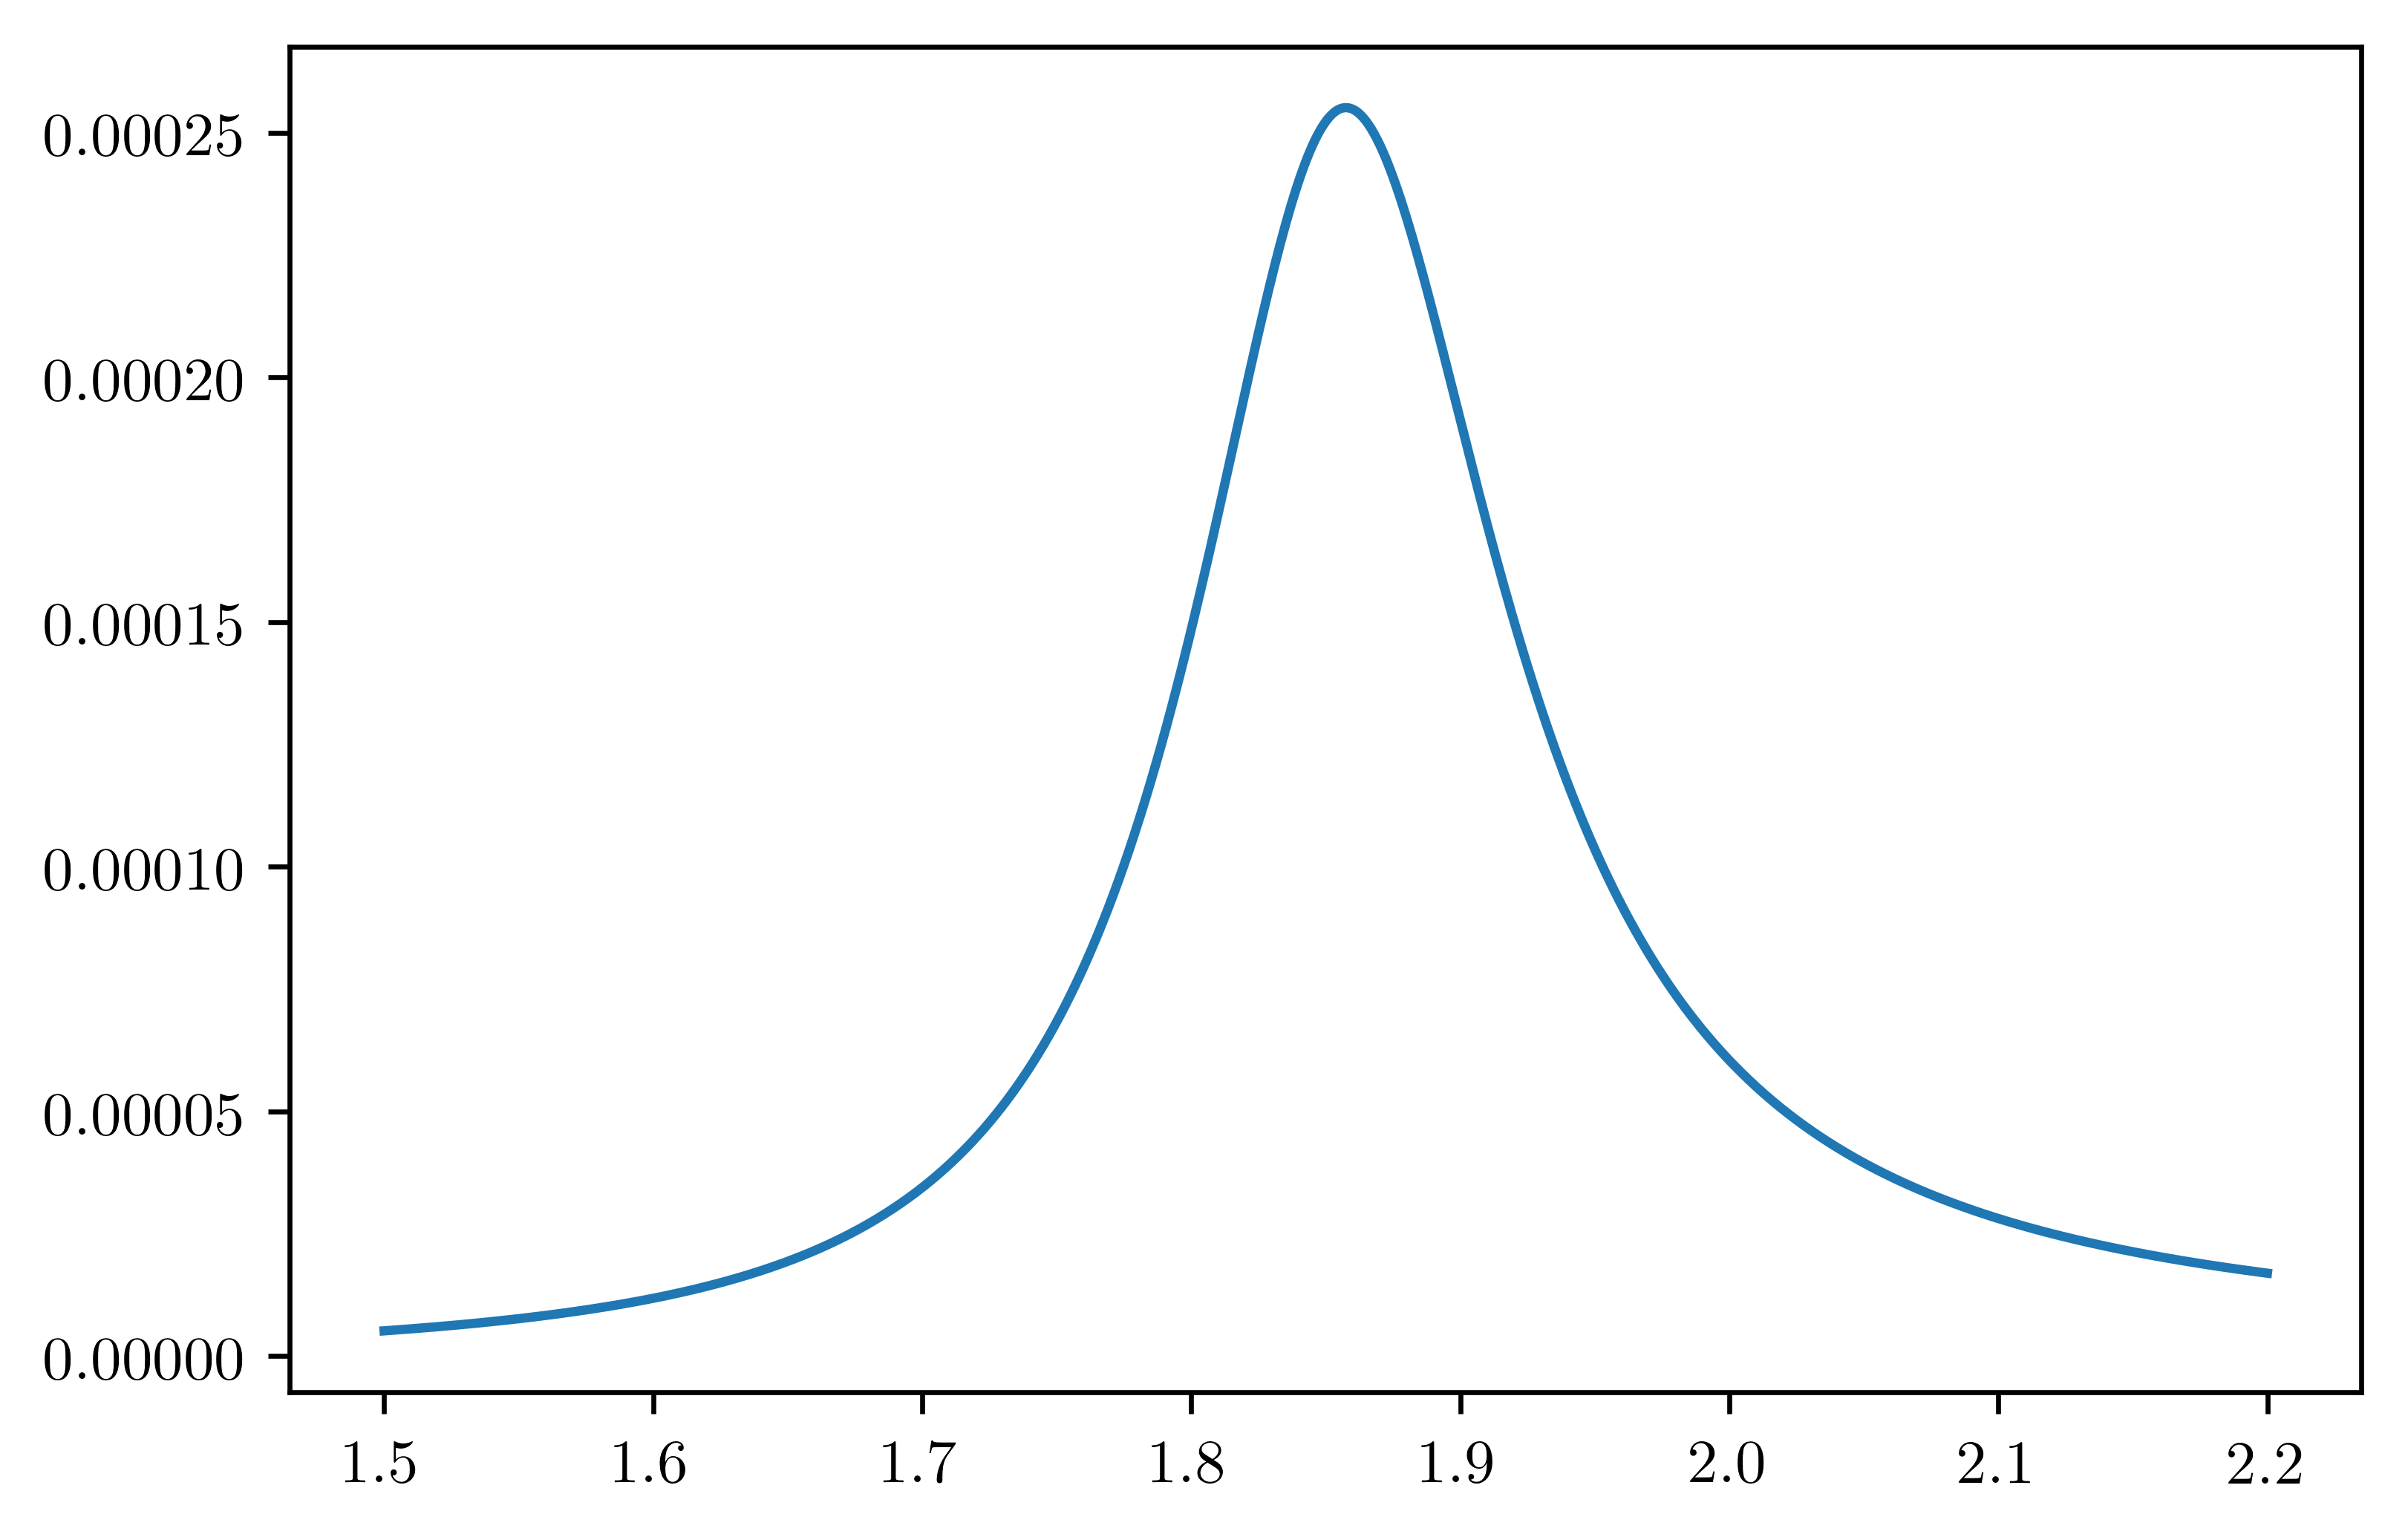

In [24]:
plt.figure(dpi=600)
p1_spec = spe.single_dip_scat_spec(1, energies=np.arange(min_energy, max_energy, freq_step_size))
plt.plot(p1_spec[0],p1_spec[1])

Text(0,0.5,'normalized scattering [no u.]')

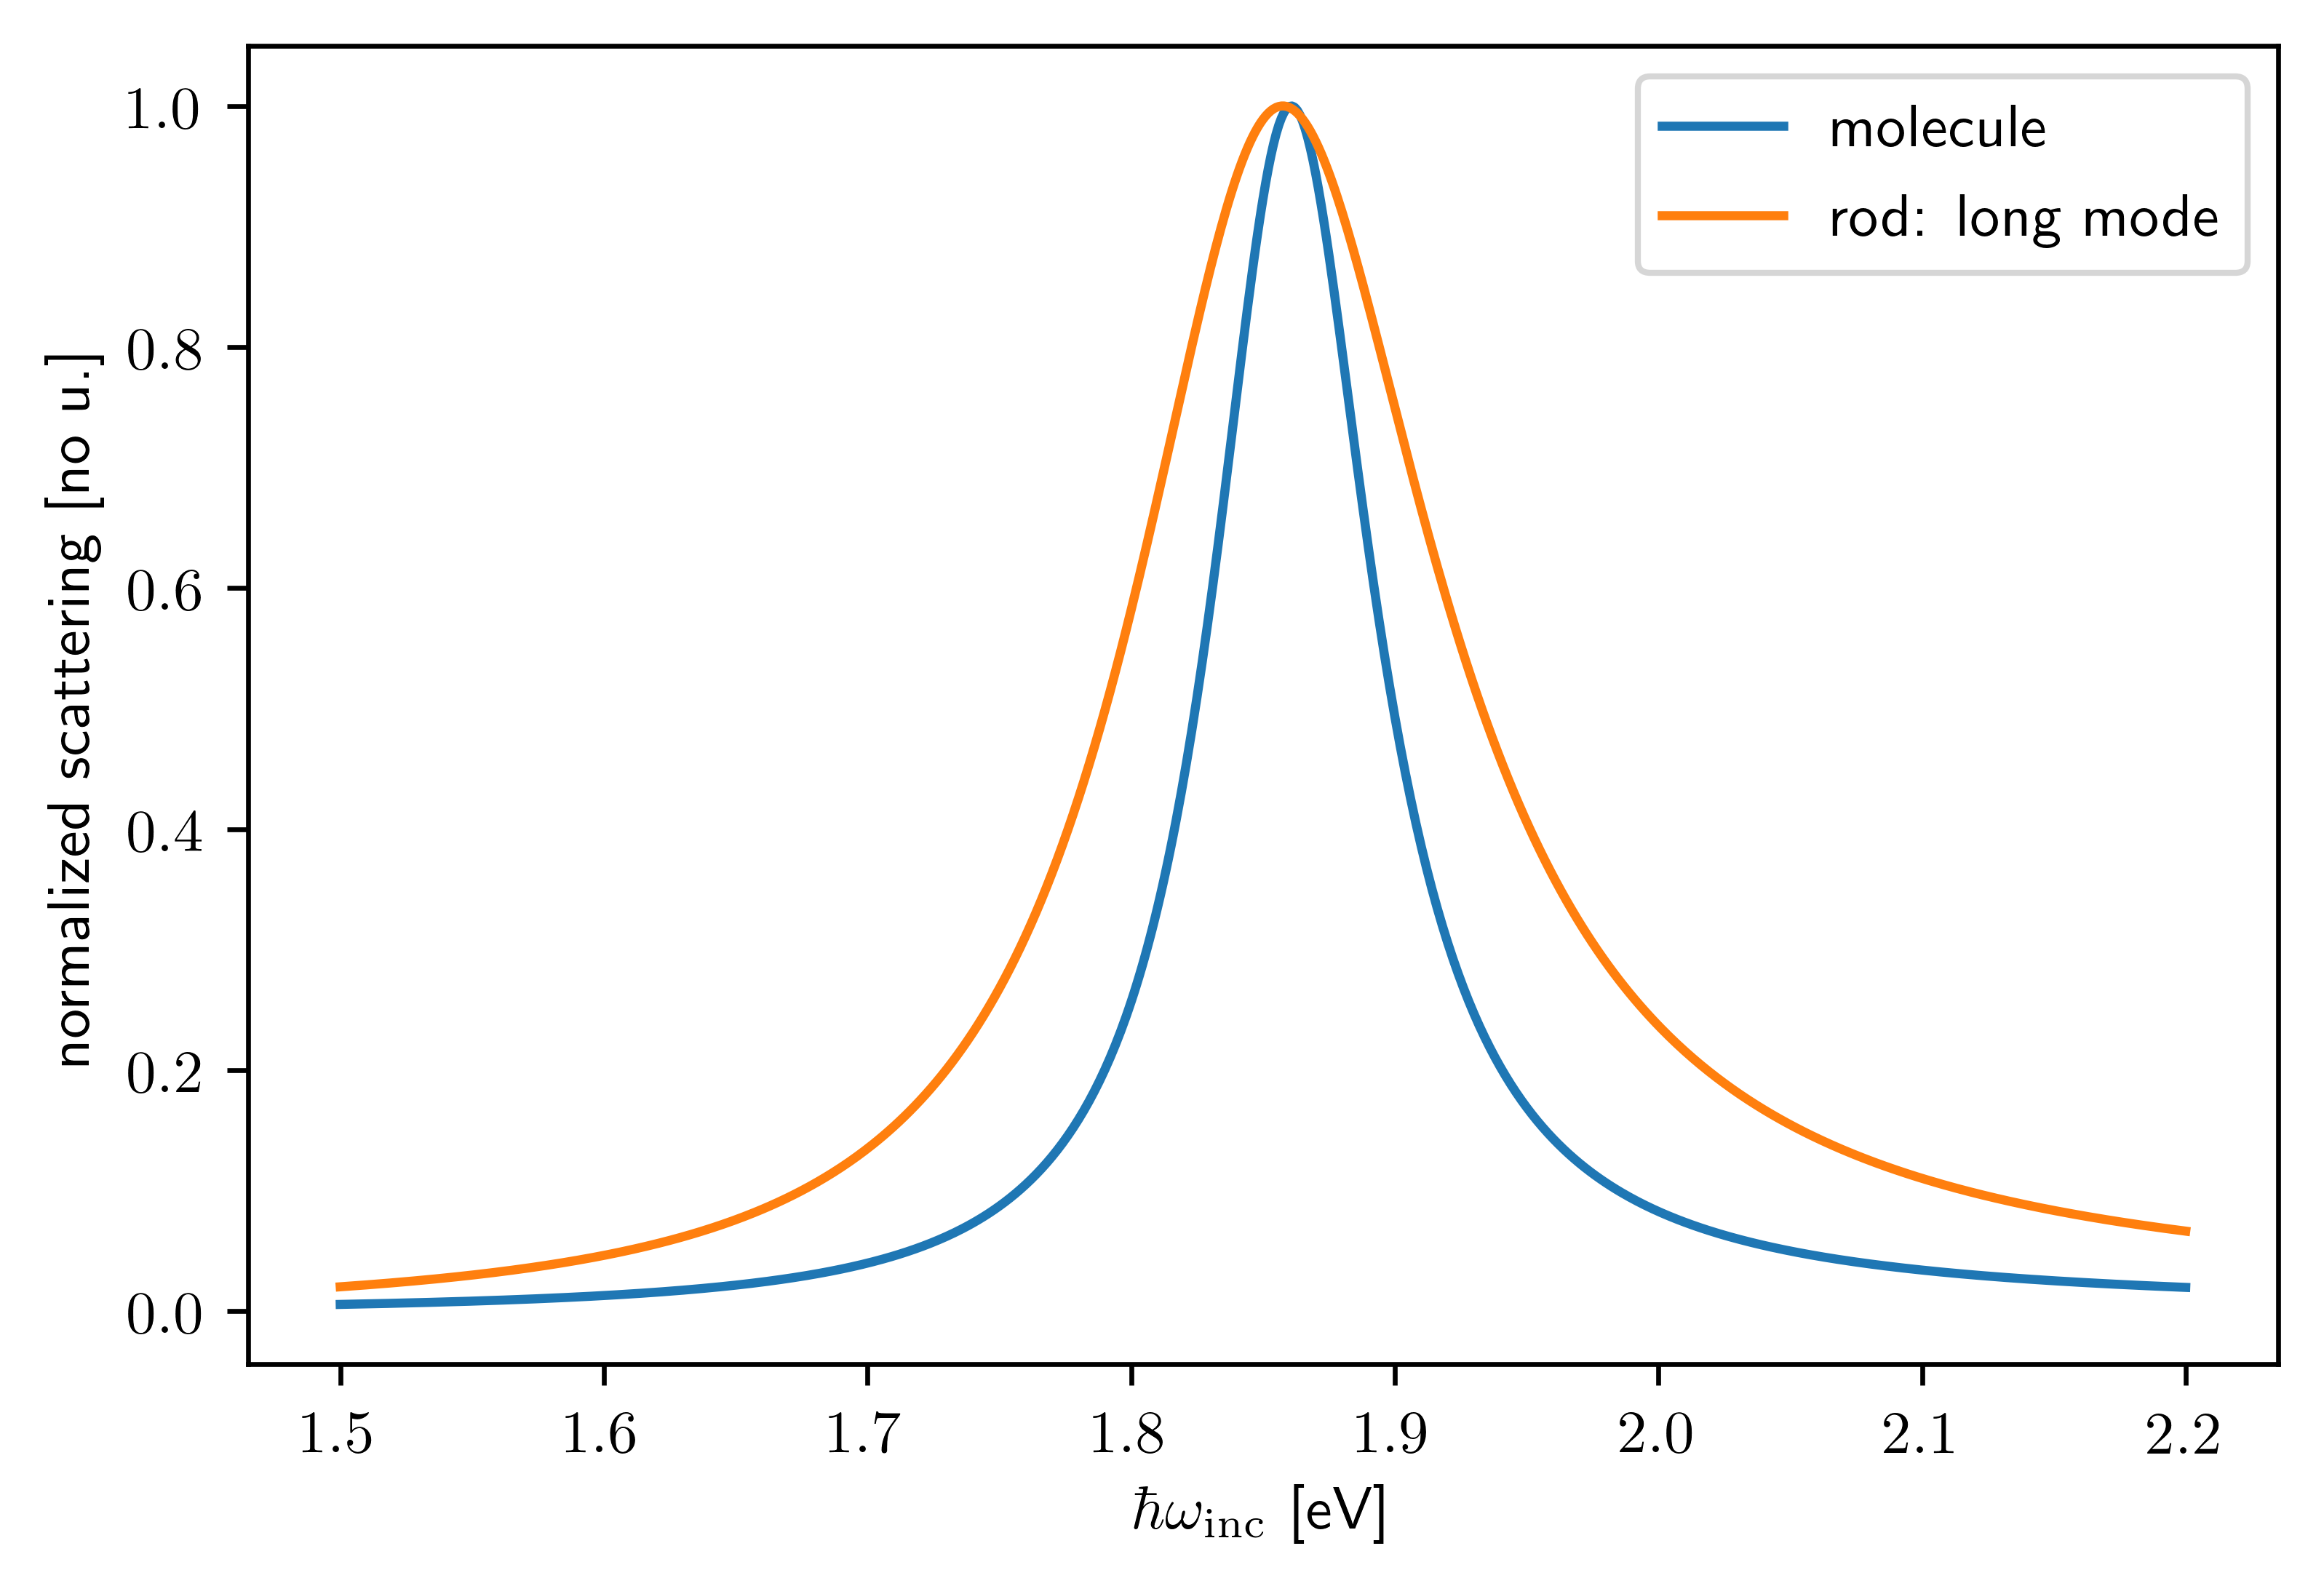

In [25]:
plt.figure(dpi=600)
plt.plot(p0_spec[0],p0_spec[1]/np.max(p0_spec[1]),label='molecule')
plt.plot(p1_spec[0],p1_spec[1]/np.max(p1_spec[1]),label='rod: long mode')
# plt.plot(spectra[0],(spectra[1].T/np.max(spectra[1].T,axis=0))[:,0], label='coupled', ls='--')
plt.legend()
plt.xlabel(r'$\hbar \omega_\mathrm{inc}$ [eV]')
plt.ylabel('normalized scattering [no u.]')

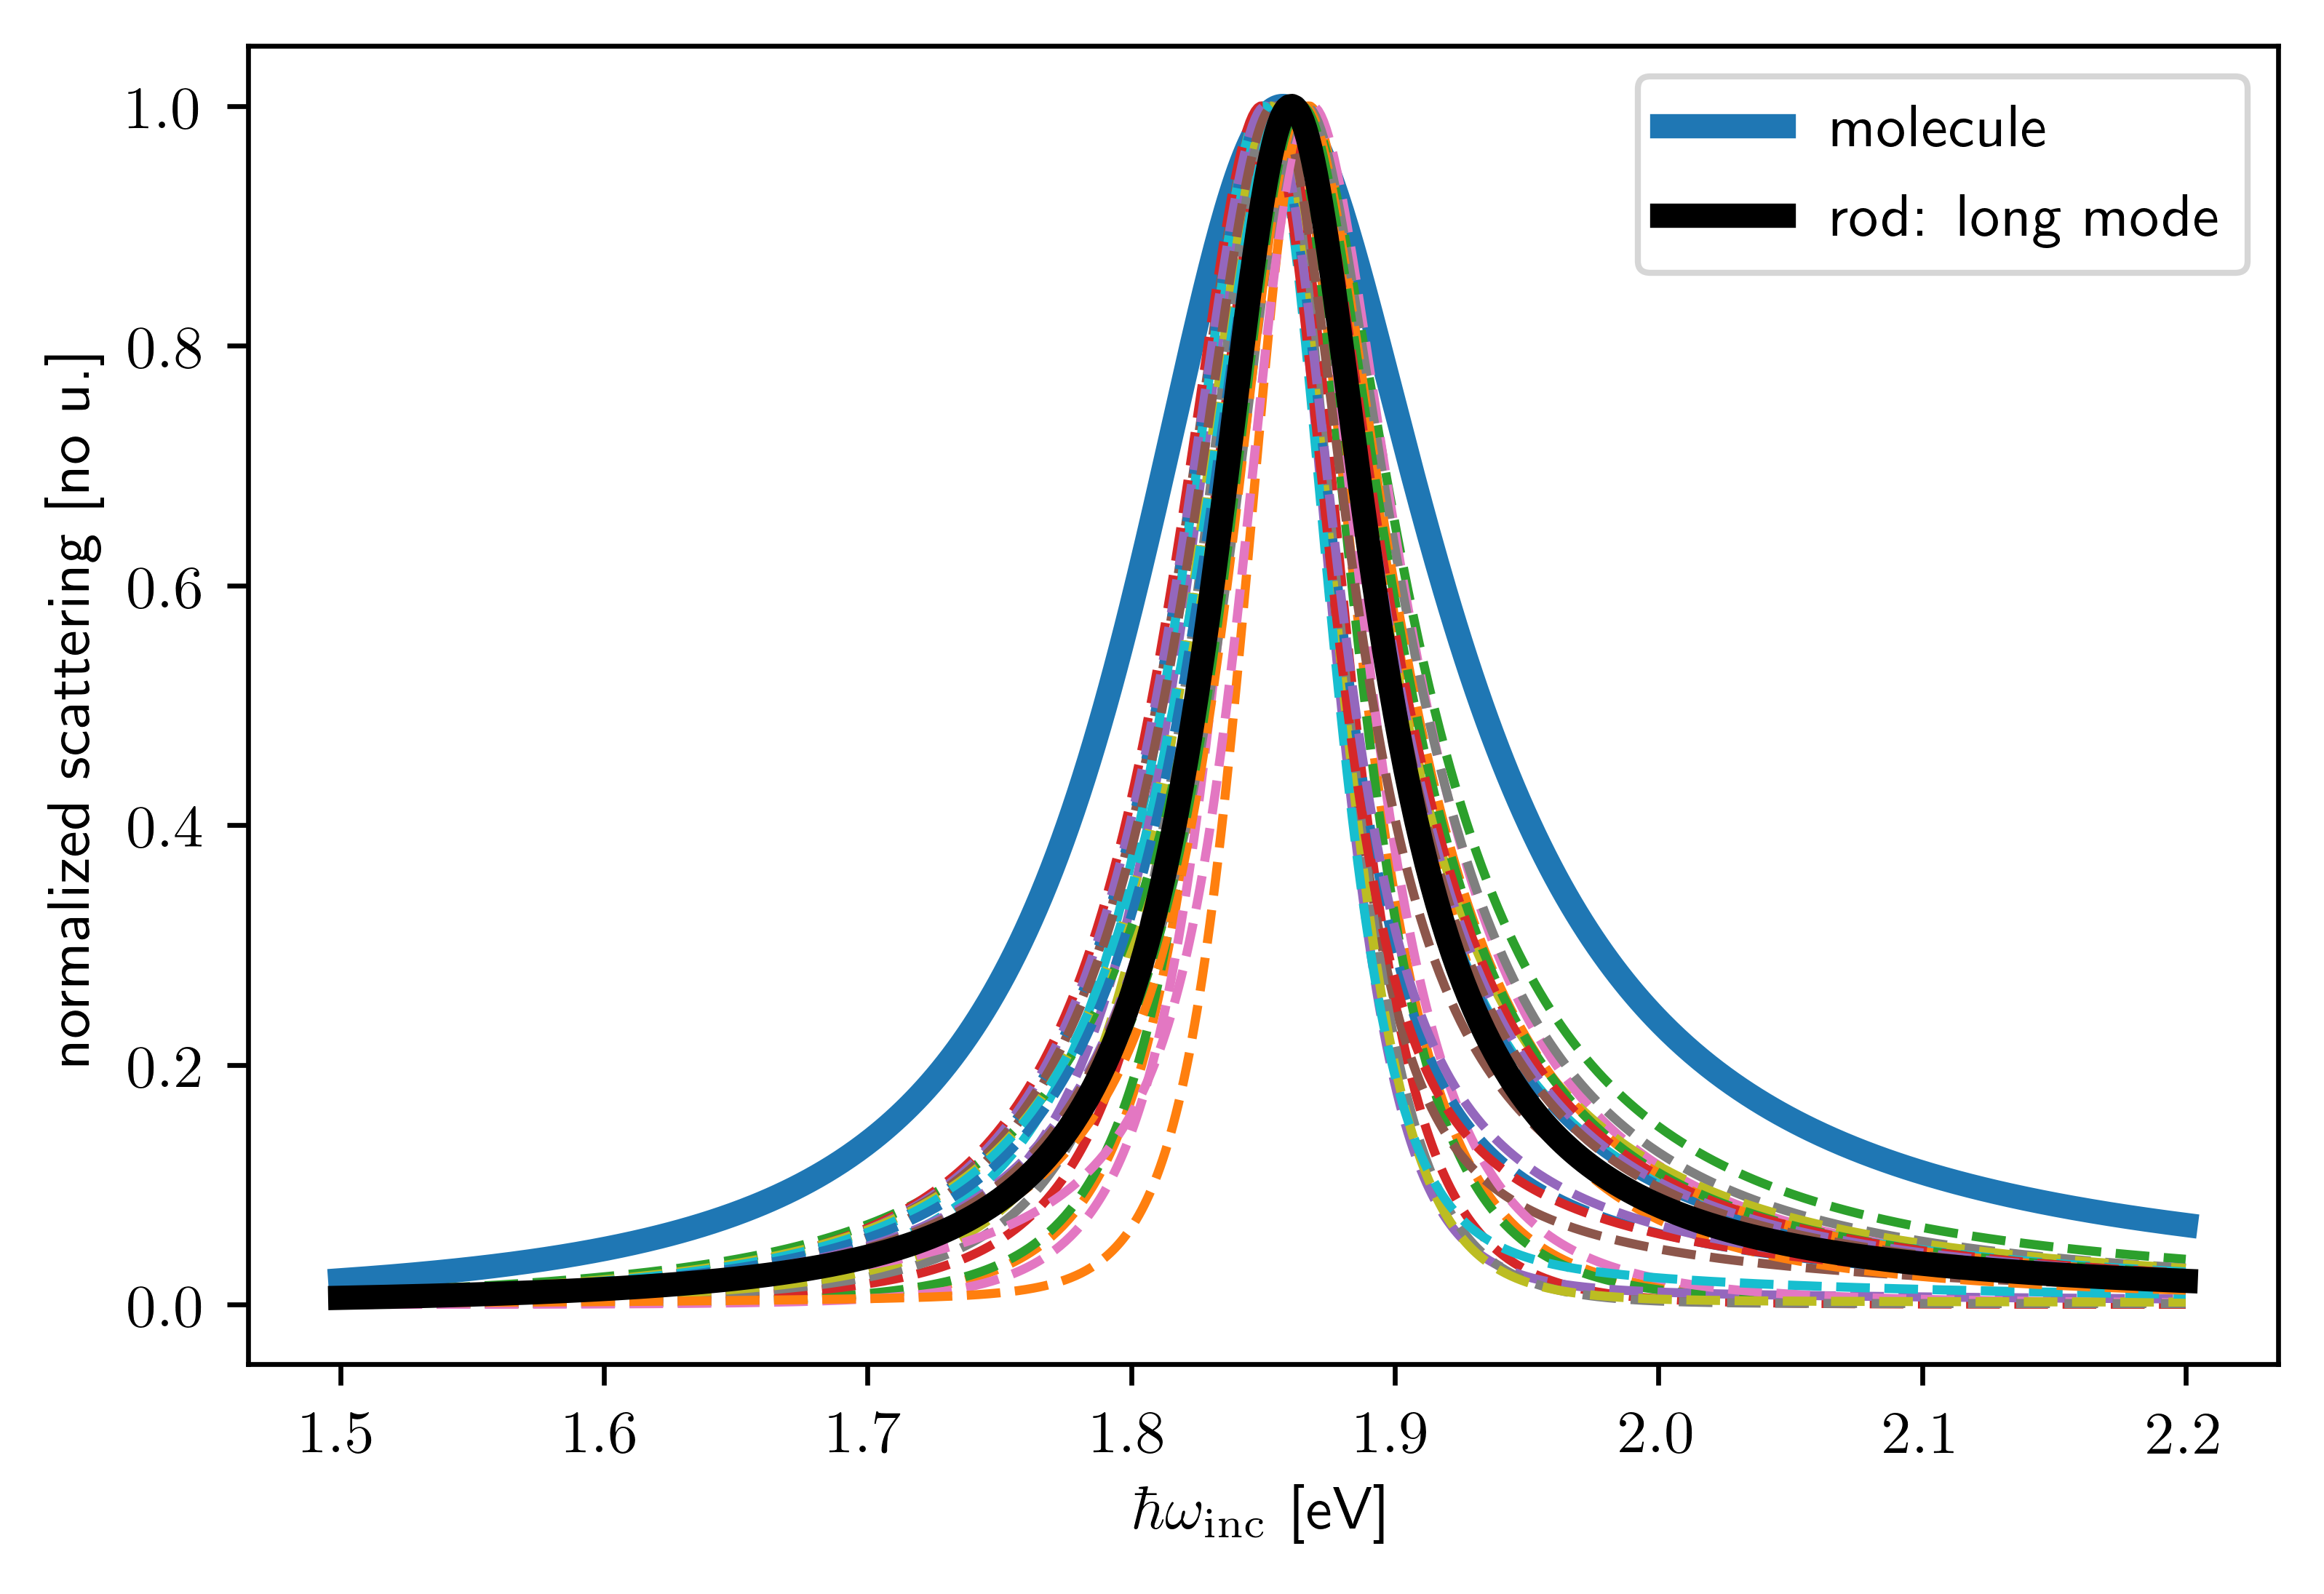

In [42]:
plt.figure(dpi=600)

plt.plot(p1_spec[0],p0_spec[1]/np.max(p1_spec[1]),label='molecule', lw = 4)
plt.plot(spectra[0],(spectra[1].T/np.max(spectra[1].T,axis=0)),  ls='--')
plt.plot(p0_spec[0],p1_spec[1]/np.max(p0_spec[1]),label='rod: long mode', lw = 4, c='black')

plt.xlabel(r'$\hbar \omega_\mathrm{inc}$ [eV]')
plt.ylabel('normalized scattering [no u.]')
plt.legend()